In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating a partially stationary returns distribution
Most surviving (and top-100 marketcap) cryptocurrencies have a exponential price history from a very low market cap until there current 100-1000x price.

The use of this price information can be misleading as a crypto is very unlikely every to repeat its rise in price once it has become established. However the price volatility might still be informative and useful when working with price risk in an asset. Creating a partially stationary return series from the original series is one attempt at divorcing this information from the price action.

First we want to load to price data. In this case I am looking at the historical FTM/USD price data from Jan 2020 until April 26. This data can be obtained from coingecko. Some additional features and indexing is some on the original data.

Finally a modification is made to the returns series such that the logreturns of the series sums to 0. The reasoning is that given we don't know future price direction we assume that future price is equal to current price but the price follows a randomwalk from the empirical distribution of the modified historical returns series. Thus we can use the modified returns to create bootstrap simulations potential price movement under the uncertainty of price direction.

In [3]:
data = pd.read_csv(r'ftm-usd-max-april26.csv') # load up data
data['snapped_at'] = pd.to_datetime(data['snapped_at'])
data = data.set_index(data.snapped_at) # set dataframe index to date
# create some additional features
data['logprice'] = np.log(data.price)
data['logret'] = np.log(data.price)-np.log(data.price).shift(1)
data['ret'] = data.price/data.price.shift(1) -1
data.logprice.plot()

,snapped_at,price,market_cap,total_volume
0,2018-10-30 00:00:00 UTC,0.013985,0.000000e+00,6.941222e+06
1,2018-10-31 00:00:00 UTC,0.021022,2.951860e+07,7.681528e+06
2,2018-11-01 00:00:00 UTC,0.024542,3.420793e+07,1.198239e+07
3,2018-11-02 00:00:00 UTC,0.022503,3.152514e+07,7.906761e+06
4,2018-11-03 00:00:00 UTC,0.022182,3.091862e+07,4.810542e+06


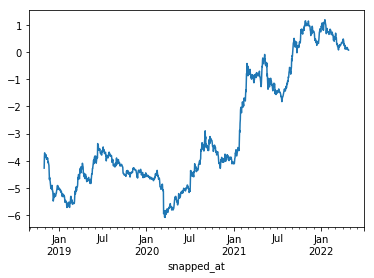

In [66]:
data.logprice.plot()

The second line in the below code block is the function to make the returns series 'stationary'. The mean of the logreturn is subtracted because the goal is to have the cummulated sum of the new modified logreturn series to equal 0.

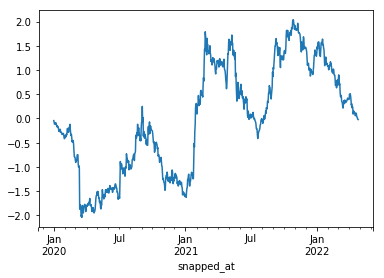

In [57]:
data0 = data.loc[(data.index >= '2020-01-01')]
mod_ret = data0.ret - np.exp(data0.logret.mean()) +1
mod_ret = mod_ret + 1
np.log(mod_ret.cumprod()).plot() # plot modified log price series

C:\Users\luciu\Anaconda3\envs\crypto_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\luciu\Anaconda3\envs\crypto_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


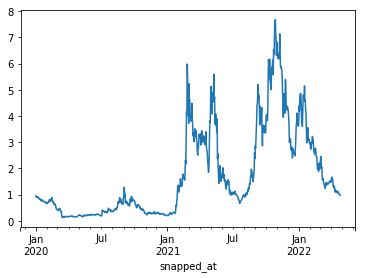

In [61]:
data0['mod_ret'] = mod_ret
data0['mod_price'] = mod_ret.cumprod()

In [63]:
data0.to_pickle('ftmusd_jan2020_stationarymodified.pkl')

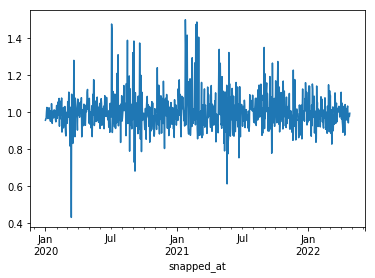

In [77]:
data0.mod_ret.plot()

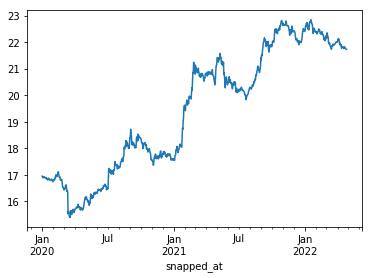

In [99]:
np.log(data0.market_cap).plot()

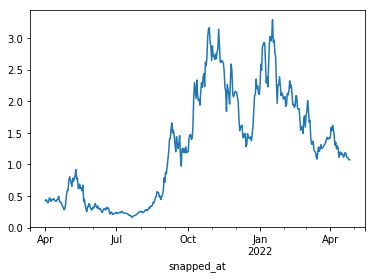

In [100]:
data0.loc[(data0.index >= '2021-04-01')].price.plot()